In [2]:
!pip3 install torchvision 

     |████████████████████████████████| 389kB 948kB/s eta 0:00:01
     |████████████████████████████████| 97.4MB 747kB/s eta 0:00:01     |█████▊                          | 17.3MB 646kB/s eta 0:02:04     |███████▍                        | 22.6MB 750kB/s eta 0:01:40     |███████▌                        | 22.9MB 420kB/s eta 0:02:58     |█████████▏                      | 27.9MB 546kB/s eta 0:02:08     |██████████▊                     | 32.8MB 638kB/s eta 0:01:42     |███████████████                 | 45.4MB 679kB/s eta 0:01:17     |██████████████████▏             | 55.2MB 620kB/s eta 0:01:09     |██████████████████▍             | 56.1MB 747kB/s eta 0:00:56     |██████████████████████████▏     | 79.8MB 552kB/s eta 0:00:32     |██████████████████████████▉     | 81.5MB 596kB/s eta 0:00:27
     |████████████████████████████████| 829kB 597kB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=bb1e1a462a363bacd72ab34adaf73246172f3e8d05125e48adfba

In [3]:
from torchvision import models
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [27]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /Users/friverap/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [28]:
print(alexnet)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [29]:
from torchvision import transforms
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

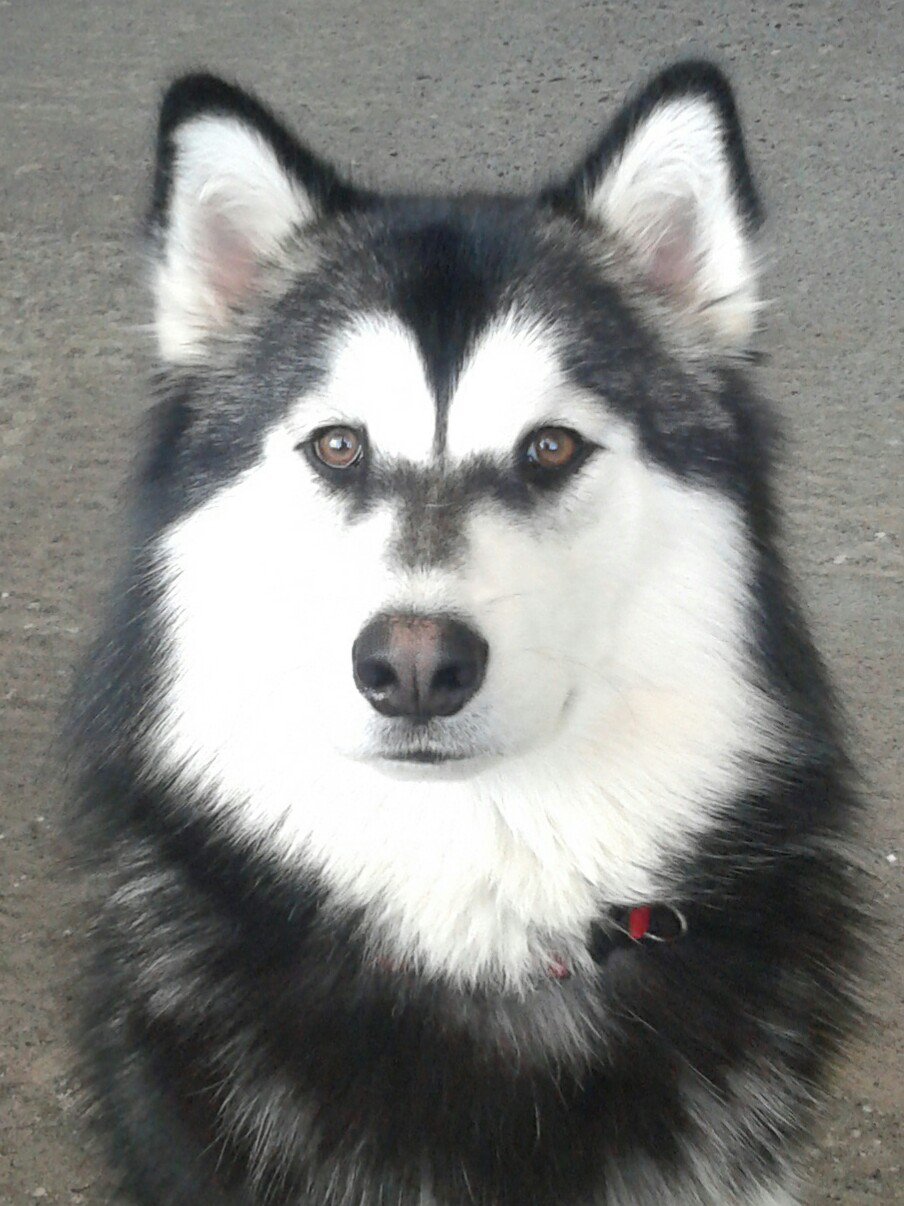

In [30]:
from PIL import Image
img = Image.open("/Users/friverap/repositorio/codes_git/ImageRecognition/loky.jpg")
img

In [33]:
img_t = transform(img)

In [34]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
alexnet.eval()

out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


In [35]:
with open('/Users/friverap/repositorio/codes_git/ImageRecognition/imagenet_classes.txt') as f:
   classes = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item())


246, Great_Dane 45.20884323120117


In [36]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]


[('246, Great_Dane', 45.20884323120117),
 ('244, Tibetan_mastiff', 33.23574447631836),
 ('245, French_bulldog', 21.354536056518555),
 ('228, komondor', 0.10643143951892853),
 ('227, kelpie', 0.02077980898320675)]

Let’s quickly go through the steps required to use resnet101 for image classification.

In [37]:
# First, load the model
resnet = models.resnet101(pretrained=True)
# Second, put the network in eval mode
resnet.eval()
# Third, carry out model inference

out = resnet(batch_t)
# Forth, print the top 5 classes predicted by the model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]


[('245, French_bulldog', 52.75352096557617),
 ('244, Tibetan_mastiff', 30.615774154663086),
 ('246, Great_Dane', 15.86154842376709),
 ('533, dishrag', 0.24608513712882996),
 ('254, pug', 0.10163266211748123)]